# Project: Investigate a Dataset (No-Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The Data set contains over 100,000 medical appointments in a country in South America(**Brazil**). The following analysis is done to check why or if patients show up for appointments or not and also to predict the possiblity of a patient showing up for an appointment or not.

In [1]:
# importing useful packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> Checking for NaN values,duplicates,incorrect datatpes and also missing data.


In [2]:
# Load data to be analysed
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
#view first 5 rows of the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#view general information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#get brief statistical anaalysis for each column in the data set, so as to make data wrangling decisions
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning (Renaming Columns and dealing with inconsitent data value by dropping.)

>The Data set contained no NaN values and also there were no duplicates.

>Columns were renamed.

>The row containing a negative age value is dropped, since we have just one it will not have significant impact on further analysis that will be performed on the data.

In [6]:
#view column original labels
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [7]:
#rename column labels using rename() function
df.rename(columns=lambda x:x.lower().replace('-','_'),inplace=True)

#check that colunmns have been renamed
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [8]:
#checking for row with negative value, which is an abnormaly in the Age column
df.query('age == -1')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
#droppinng the row using the index of the row with the drop function
df.drop([99832],axis=0,inplace=True)

In [10]:
#confirm the row has been dropped
df.iloc[99830:99833]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99830,7.216327e+14,5774220,M,2016-06-06T07:59:53Z,2016-06-06T00:00:00Z,1,ROMÃO,0,0,0,0,0,0,No
99831,9.825178e+13,5774337,M,2016-06-06T08:08:00Z,2016-06-06T00:00:00Z,7,CRUZAMENTO,0,0,0,0,0,0,No
99833,2.898271e+13,5774075,M,2016-06-06T07:50:27Z,2016-06-06T00:00:00Z,1,FORTE SÃO JOÃO,0,0,0,0,0,0,No


In [11]:
#reset index to be ordered
df = df.reset_index(drop=True)

In [12]:
#confirm index is ordered
df.iloc[99830:99833]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99830,7.216327e+14,5774220,M,2016-06-06T07:59:53Z,2016-06-06T00:00:00Z,1,ROMÃO,0,0,0,0,0,0,No
99831,9.825178e+13,5774337,M,2016-06-06T08:08:00Z,2016-06-06T00:00:00Z,7,CRUZAMENTO,0,0,0,0,0,0,No
99832,2.898271e+13,5774075,M,2016-06-06T07:50:27Z,2016-06-06T00:00:00Z,1,FORTE SÃO JOÃO,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis
>seperate data sets will be explored for patients who show up for thier appointments and the ones who do not and we wil also see the factores that lead to either
> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


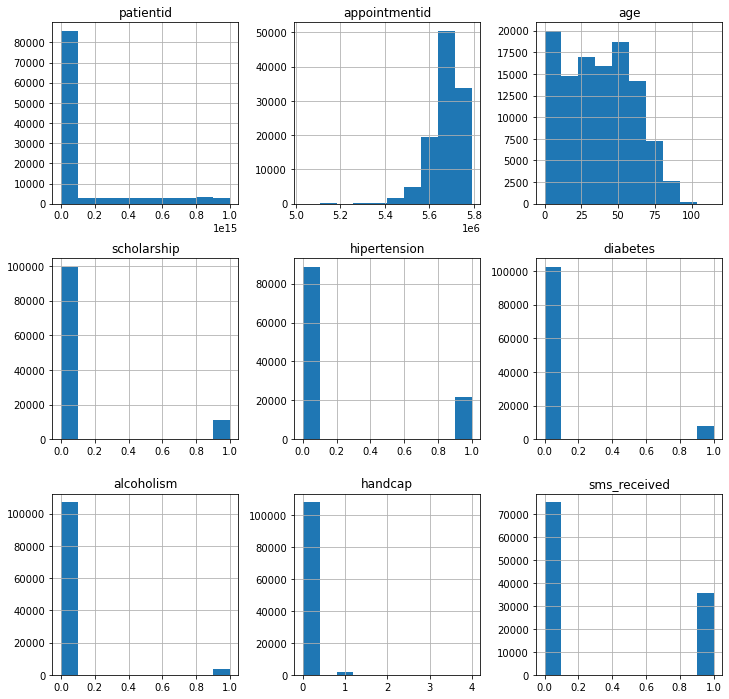

In [13]:
#GENERAL EXPLORATION
df.hist(figsize=(12,12));

## Bar and Pie plots between variables

In [14]:
#defining function for bar plot
def plot_bar(independent):
    colors = ['red','green']
    df.groupby([independent])['no_show'].value_counts(normalize=True).unstack('no_show').plot(kind='bar',color = colors,rot=0)
    plt.title('Plot Showing Relationship Between No_Show and {}'.format(independent.title()),weight='bold')
    plt.xlabel(independent.title(),weight='bold')
    plt.ylabel('Proportion',weight='bold')
    plt.legend();

In [15]:
#defining function for pie plot
def plot_pie(independent):
    df[independent].value_counts().plot.pie(figsize=(14,6))
    plt.title('Pie Chart Distibution for {}'.format(independent.title()),weight='bold')
    plt.ylabel(independent.title(),weight='bold')
    plt.legend();

### Research Question 1 (Does SMS Recieved determine if a patient will show up for an appointement or not?)

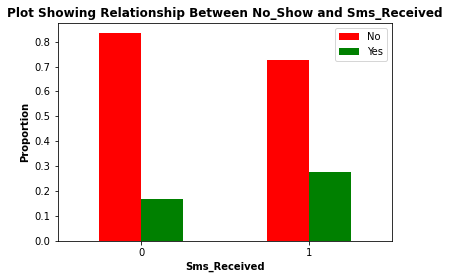

In [16]:
#Displays bar chart of No_show and Sms_Received
plot_bar('sms_received')

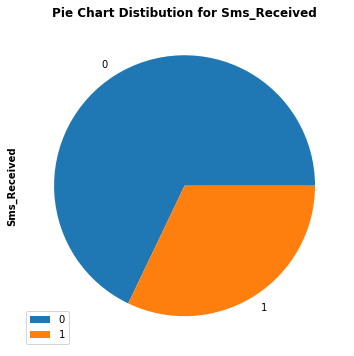

In [17]:
#Displays pie chart for Sms_Received
plot_pie('sms_received')

> 0 represents patients who did not receive messages while
> 1 represents patients who received messages

> It shows a good number of patients receieved messages

### Research Question 2  (Do patients who have diabetes show up for appointments or not?)

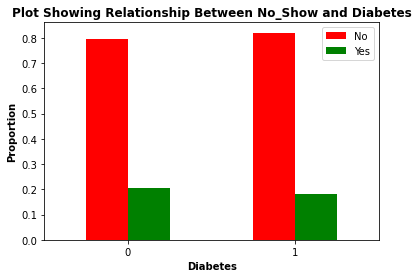

In [18]:
#Displays bar chart of No_show and patients with and without Diabetes
plot_bar('diabetes')

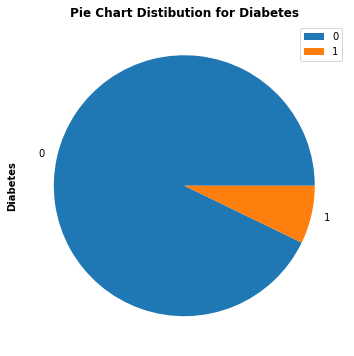

In [19]:
#Displays pie chart for patients with and without Diabetes
plot_pie('diabetes')

>0 represents patients who are not diagnosed with diabetes while
>1 represents patients who are diagnosed with diabetes

>It shows few patients are diagnosed with Diabetes

### Research Question 3 (Do patients who are on scholarship show up for appointments or not?)

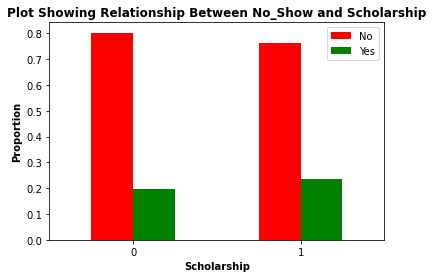

In [20]:
#Displays bar chart of No_show and patients with and without Scholarship
plot_bar('scholarship')

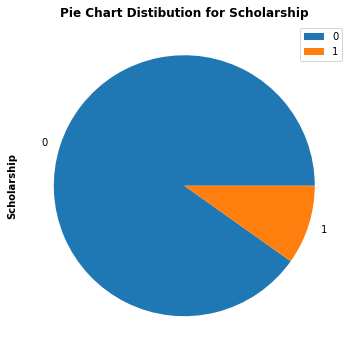

In [21]:
#Displays pie chart for patients with and without Scholarship
plot_pie('scholarship')

>0 represents patients who are not on the scholarship while
>1 represents pattients who are on the scholarship

>It Shows that most patients are without the Scholarship.

<a id='conclusions'></a>
## Conclusions

>1. Most Patients who did not recieve an sms did not show up for their appointments, the lot also shows that patients who recieve sms are most likely to show up for thier appointments.
>2. Patients who are not on scholarship are most likely to show up for their appointments.
>3. The plot shows patients who showed for the appointment and are not diabetic are more than the ones who showed and and are diabetic.

>Additional research can be done to check if the reason for a patient missing an appointment could be if the patient have multiple appointments on the same day in different neighbourhoods.


>Additional research can also check if a patient is handicap or not has an effect on the patient making apointments or not.